In [1]:
import numpy as np # linear algebra 
import pandas as pd #scientific computation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spaceserver.csv")

In [3]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
df["class"].value_counts().sort_index()

GALAXY    4998
QSO        850
STAR      4152
Name: class, dtype: int64

In [6]:
df.columns.values

array(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun',
       'camcol', 'field', 'specobjid', 'class', 'redshift', 'plate',
       'mjd', 'fiberid'], dtype=object)

In [7]:
df.drop(["objid","specobjid","run","rerun","camcol","field"], axis = 1, inplace = True)
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512


In [8]:
print("Mapping: ", dict(enumerate(["GALAXY","QSO","STAR"])))
df["class"] = df["class"].astype("category")
df["class"] = df["class"].cat.codes
print(df["class"].value_counts().sort_index())

Mapping:  {0: 'GALAXY', 1: 'QSO', 2: 'STAR'}
0    4998
1     850
2    4152
Name: class, dtype: int64


In [9]:
corr_matrix = df.corr()
corr_matrix["class"].sort_values(ascending = False)

class       1.000000
mjd         0.648768
plate       0.585495
z           0.215758
i           0.146791
fiberid     0.053593
r           0.049628
ra         -0.043219
dec        -0.058918
redshift   -0.075510
g          -0.099212
u          -0.269044
Name: class, dtype: float64

In [10]:
sdss_feat = df.drop("class", axis = 1)
sdss_labels = df["class"].copy()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(sdss_feat, sdss_labels, test_size=0.2, random_state=42, stratify=sdss_labels)

In [12]:
default_forest = RandomForestClassifier(random_state = 42)
default_forest.fit(X_train, y_train)
default_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [13]:
print("Test accuracy for default forest:", default_forest.score(X_test, y_test))

Test accuracy for default forest: 0.992


In [14]:
y_pred = default_forest.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_pd = pd.DataFrame(data = conf_matrix, 
                              index = ["GALAXY","QSO","STAR"],
                              columns = ["GALAXY","QSO","STAR"])
conf_matrix_pd

,GALAXY,QSO,STAR
GALAXY,992,2,6
QSO,8,162,0
STAR,0,0,830


In [15]:
feat_imp_pd = pd.DataFrame(data = default_forest.feature_importances_,
                          index = sdss_feat.columns,
                          columns = ["Importance"])
feat_imp_pd = feat_imp_pd.sort_values(by = 'Importance', ascending = False)
feat_imp_pd

,Importance
redshift,0.556177
plate,0.116793
mjd,0.106515
i,0.055811
z,0.051988
r,0.043139
g,0.036228
u,0.021411
ra,0.004092
fiberid,0.004048


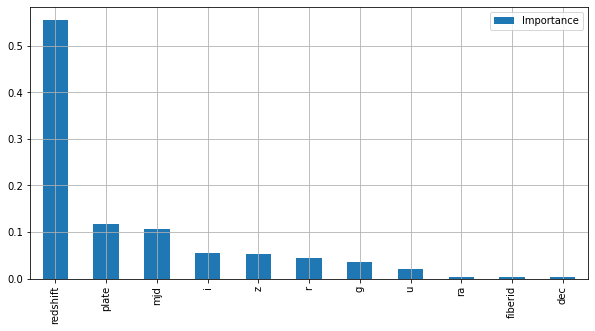

In [16]:
feat_imp_pd.plot(kind = "bar", figsize = (10,5), grid = True)
plt.show()

In [17]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               scoring = 'accuracy', 
                               n_iter = 25, 
                               cv = 4, 
                               verbose = 2, 
                               random_state = 42,
                               n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=42, scoring='accuracy', verbose=2)

In [26]:
rf_random.best_score_

0.98875

In [27]:
best_forest = rf_random.best_estimator_
best_forest

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=5,
                       n_estimators=670)

In [28]:
print("Test accuracy for best forest:", best_forest.score(X_test, y_test))

Test accuracy for best forest: 0.9915


In [29]:
y_pred = best_forest.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_pd = pd.DataFrame(data = conf_matrix,
                              index = ["GALAXY","QSO","STAR"],
                              columns = ["GALAXY","QSO","STAR"])
conf_matrix_pd

,GALAXY,QSO,STAR
GALAXY,992,2,6
QSO,9,161,0
STAR,0,0,830


In [30]:
feat_imp_pd = pd.DataFrame(data = best_forest.feature_importances_,
                           index = sdss_feat.columns,
                           columns = ["Importance"])
feat_imp_pd = feat_imp_pd.sort_values(by = 'Importance', ascending = False)
feat_imp_pd

,Importance
redshift,0.511985
plate,0.146853
mjd,0.115892
z,0.059909
i,0.058456
r,0.041896
g,0.033531
u,0.020566
ra,0.003899
dec,0.003522


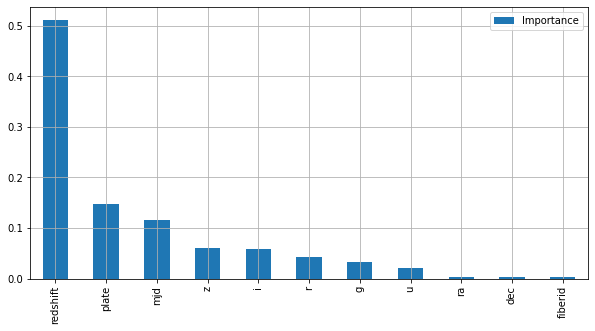

In [31]:
feat_imp_pd.plot(kind = "bar", figsize = (10,5), grid = True)
plt.show()